## **Load and Preprocess the Data**

### load the CIFAR-10 dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels shape: {y_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Training data shape: (50000, 32, 32, 3), Labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3), Labels shape: (10000, 1)


### normalize the pixel values to the range [0,1]

In [2]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print(f"Min pixel value: {x_train.min()}, Max pixel value: {x_train.max()}")

Min pixel value: 0.0, Max pixel value: 1.0


### One-Hot Encoding the Labels

In [3]:
from tensorflow.keras.utils import to_categorical

# Number of classes in CIFAR-10
num_classes = 10

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(f"New shape of y_train: {y_train.shape}")
print(f"New shape of y_test: {y_test.shape}")

New shape of y_train: (50000, 10)
New shape of y_test: (10000, 10)


### Visualize some examples from the dataset

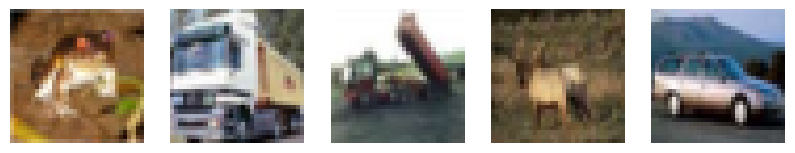

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i])
    ax.axis('off')
plt.show()

## **Step 2: Building the CNN Model**

### Define the CNN model

In [5]:
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def build_model():
    model = models.Sequential([
        # First convolutional layer
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D(pool_size=(2,2)),
        # Second convolutional layer
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        # Flatten the feature maps
        layers.Flatten(),
        # Fully connected layer
        layers.Dense(128, activation='relu'),
        # Output layer (softmax for classification)
        layers.Dense(10, activation='softmax')
    ])
    model.summary()
    return model

In [6]:
model = build_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

### Compile the Model

In [7]:
def compile_model(model):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [8]:
model = compile_model(model)

## **Step 3: Train and Evaluate the Model**

### Train the model
10 epochs with a batch size of 32

In [9]:
def train_model(model, x_train, y_train, epochs=10, batch_size=32):
    history = model.fit(
        x_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=.2
    )
    return history

In [10]:
history = train_model(model, x_train, y_train)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3829 - loss: 1.6851 - val_accuracy: 0.5735 - val_loss: 1.2021
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6121 - loss: 1.1148 - val_accuracy: 0.5993 - val_loss: 1.1421
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6744 - loss: 0.9352 - val_accuracy: 0.6732 - val_loss: 0.9566
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7155 - loss: 0.8125 - val_accuracy: 0.6804 - val_loss: 0.9313
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7475 - loss: 0.7182 - val_accuracy: 0.6921 - val_loss: 0.9102
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7786 - loss: 0.6363 - val_accuracy: 0.6882 - val_loss: 0.9152
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8086 - loss: 0.5485 - val_accuracy: 0.6939 - val_loss: 0.9404
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8326 - loss: 0.4738 

### Evaluate the model

In [11]:
# Evaluate the model on the test set

test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6853 - loss: 1.0956
Test Accuracy: 0.6858


### Plot Accuracy & Loss Curves

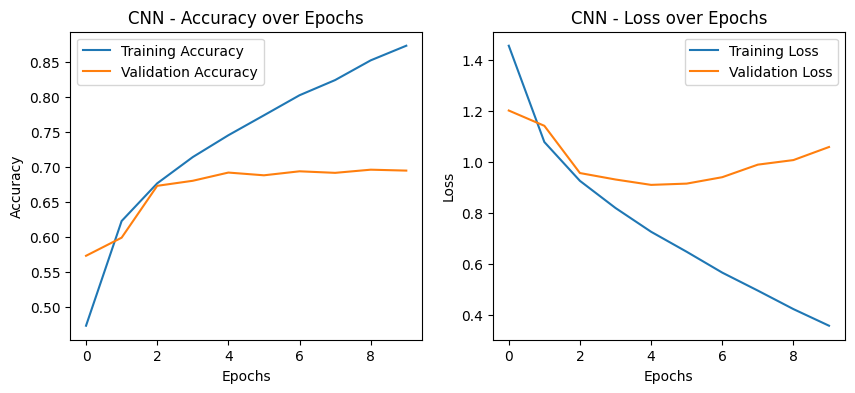

In [12]:
import matplotlib.pyplot as plt

def plot_training_history(history, model_name="Model"):

    # Extract accuracy and loss
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create a figure
    plt.figure(figsize=(10, 4))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(train_acc, label="Training Accuracy")
    plt.plot(val_acc, label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title(f"{model_name} - Accuracy over Epochs")

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label="Training Loss")
    plt.plot(val_loss, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"{model_name} - Loss over Epochs")

    # Show plots
    plt.show()

# Example Usage:
plot_training_history(history, model_name="CNN")

## **Step 4: Improve the Model**

### Add Dropout Layers (Reduce Overfitting)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_improved_cnn(input_shape=(32, 32, 3), num_classes=10):
    """
    Builds and compiles an improved CNN model with Dropout.

    Args:
        input_shape (tuple): Shape of input images (default: CIFAR-10 size).
        num_classes (int): Number of output classes (default: 10 for CIFAR-10).

    Returns:
        Compiled Keras model.
    """
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2,2)),
        Dropout(0.25),  # Dropout to reduce overfitting

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Dropout(0.25),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    compile_model(model)

    return model

model_improved = build_improved_cnn()
model_improved.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

### Increase Model Depth (More Conv Layers)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def build_deeper_cnn(input_shape=(32, 32, 3), num_classes=10):
    """
    Builds and compiles a deeper CNN model with extra convolutional layers.

    Args:
        input_shape (tuple): Shape of input images (default: CIFAR-10 size).
        num_classes (int): Number of output classes (default: 10 for CIFAR-10).

    Returns:
        Compiled Keras model.
    """
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2,2)),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),

        Conv2D(128, (3,3), activation='relu'),  # Extra convolutional layer
        MaxPooling2D((2,2)),

        Flatten(),
        Dense(256, activation='relu'),  # Increased neurons
        Dense(num_classes, activation='softmax')
    ])


    compile_model(model)
    return model

model_deeper = build_deeper_cnn()
model_deeper.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,146 (887.29 KB)

 Trainable params: 227,146 (887.29 KB)

 Non-trainable params: 0 (0.00 B)

### Use Data Augmentation (More Diverse Data)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Fit the data generator to training data
datagen.fit(x_train)

### Train and Evaluate Improved Models

In [16]:
from sklearn.model_selection import train_test_split

x_train_new, x_val, y_train_new, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

history_improved = train_model(model_improved, x_train_new, y_train_new)
history_deeper = train_model(model_deeper, x_train_new, y_train_new)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2649 - loss: 1.9730 - val_accuracy: 0.4984 - val_loss: 1.4282
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4575 - loss: 1.4934 - val_accuracy: 0.5496 - val_loss: 1.2514
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5124 - loss: 1.3600 - val_accuracy: 0.6000 - val_loss: 1.1450
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5539 - loss: 1.2609 - val_accuracy: 0.6179 - val_loss: 1.0774
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5675 - loss: 1.1968 - val_accuracy: 0.6373 - val_loss: 1.0402
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5953 - loss: 1.1455 - val_accuracy: 0.6447 - val_loss: 1.0246
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6101 - loss: 1.1063 - val_accuracy: 0.6585 - val_loss: 0.9880
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6165 - loss: 1.0913 -

In [17]:
improved_test_loss, improved_test_acc = model_improved.evaluate(x_test, y_test)

print(f"Model Improved Test Accuracy: {improved_test_acc:.4f}")

deeper_test_loss, deeper_test_acc = model_deeper.evaluate(x_test, y_test)

print(f"Model Deeper Test Accuracy: {deeper_test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6803 - loss: 0.9285
Model Improved Test Accuracy: 0.6770
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7037 - loss: 1.0034
Model Deeper Test Accuracy: 0.6961


### **Increase the batch size**

In [24]:
model = build_model()
model_improved = build_improved_cnn()
model_deeper = build_deeper_cnn()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
compile_model(model)
history1 = train_model(model, x_train, y_train,10,64)
history_improved = train_model(model_improved, x_train, y_train,10,64)
history_deeper = train_model(model_deeper, x_train, y_train,10,64)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3522 - loss: 1.7666 - val_accuracy: 0.5438 - val_loss: 1.3071
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5619 - loss: 1.2427 - val_accuracy: 0.6014 - val_loss: 1.1481
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6272 - loss: 1.0592 - val_accuracy: 0.6361 - val_loss: 1.0483
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6707 - loss: 0.9443 - val_accuracy: 0.6618 - val_loss: 0.9951
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6980 - loss: 0.8609 - val_accuracy: 0.6812 - val_loss: 0.9449
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7196 - loss: 0.8072 - val_accuracy: 0.6895 - val_loss: 0.9180
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7436 - loss: 0.7397 - val_accuracy: 0.6947 - val_loss: 0.9164
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7661 - loss: 0.6737 - val_accuracy: 0.

In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Base Model Test Accuracy 64 batch size: {test_acc:.4f}")

improved_test_loss, improved_test_acc = model_improved.evaluate(x_test, y_test)

print(f"Model Improved Test Accuracy 64 batch size: {improved_test_acc:.4f}")

deeper_test_loss, deeper_test_acc = model_deeper.evaluate(x_test, y_test)

print(f"Model Deeper Test Accuracy 64 batch size: {deeper_test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6993 - loss: 0.9075
Base Model Test Accuracy 64 batch size: 0.6979
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6718 - loss: 0.9536
Model Improved Test Accuracy 64 batch size: 0.6719
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7155 - loss: 0.8610
Model Deeper Test Accuracy 64 batch size: 0.7095


### **Increase the Number of epochs**

In [27]:
model = build_model()
model_improved = build_improved_cnn()
model_deeper = build_deeper_cnn()
compile_model(model)
history1 = train_model(model, x_train, y_train,15,64)
history_improved = train_model(model_improved, x_train, y_train,15,64)
history_deeper = train_model(model_deeper, x_train, y_train,15,64)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.3553 - loss: 1.7775 - val_accuracy: 0.5371 - val_loss: 1.2935
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5694 - loss: 1.2179 - val_accuracy: 0.6124 - val_loss: 1.1045
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6325 - loss: 1.0640 - val_accuracy: 0.6325 - val_loss: 1.0640
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6703 - loss: 0.9483 - val_accuracy: 0.6696 - val_loss: 0.9719
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7028 - loss: 0.8572 - val_accuracy: 0.6548 - val_loss: 1.0012
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7283 - loss: 0.7837 - val_accuracy: 0.6802 - val_loss: 0.9376
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7479 - loss: 0.7293 - val_accuracy: 0.6846 - val_loss: 0.9454
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7665 - loss: 0.6714 - val_accuracy: 0.

In [28]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Base Model Test Accuracy 64 batch size, 15 epochs: {test_acc:.4f}")

improved_test_loss, improved_test_acc = model_improved.evaluate(x_test, y_test)

print(f"Model Improved Test Accuracy 64 batch size, 15 epochs: {improved_test_acc:.4f}")

deeper_test_loss, deeper_test_acc = model_deeper.evaluate(x_test, y_test)

print(f"Model Deeper Test Accuracy 64 batch size, 15 epochs: {deeper_test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6813 - loss: 1.1326
Base Model Test Accuracy 64 batch size, 15 epochs: 0.6789
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6987 - loss: 0.8605
Model Improved Test Accuracy 64 batch size, 15 epochs: 0.7034
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7132 - loss: 1.0863
Model Deeper Test Accuracy 64 batch size, 15 epochs: 0.7094


## **Visualisations**

### **Comparison plots for Test Loss and Test Accuracy**

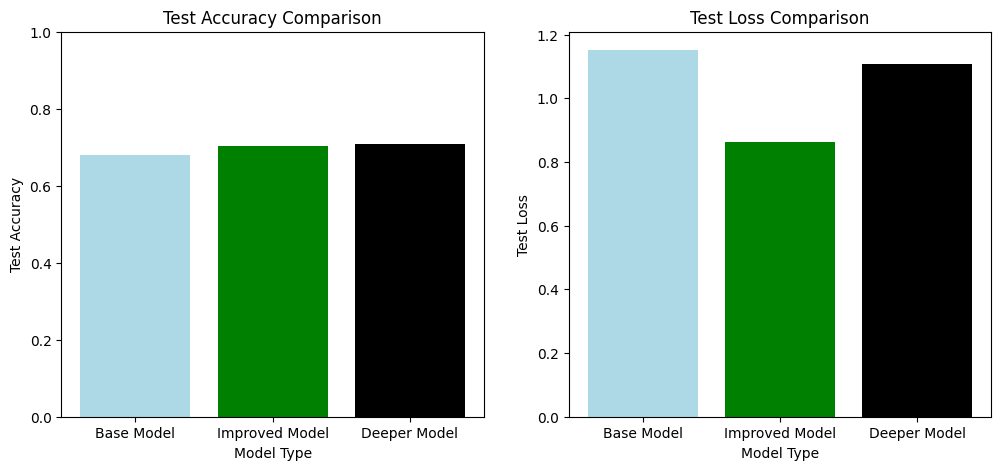

In [33]:
import matplotlib.pyplot as plt

models = ["Base Model", "Improved Model", "Deeper Model"]
test_accuracies = [test_acc, improved_test_acc, deeper_test_acc]
test_losses = [test_loss, improved_test_loss, deeper_test_loss]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(models, test_accuracies, color=['lightblue', 'green', 'black'])
plt.ylim(0, 1)
plt.xlabel("Model Type")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Comparison")

plt.subplot(1, 2, 2)
plt.bar(models, test_losses, color=['lightblue', 'green', 'black'])
plt.xlabel("Model Type")
plt.ylabel("Test Loss")
plt.title("Test Loss Comparison")

plt.show()

            Model  Test Accuracy
0      Base Model         0.6789
1  Improved Model         0.7034
2    Deeper Model         0.7094


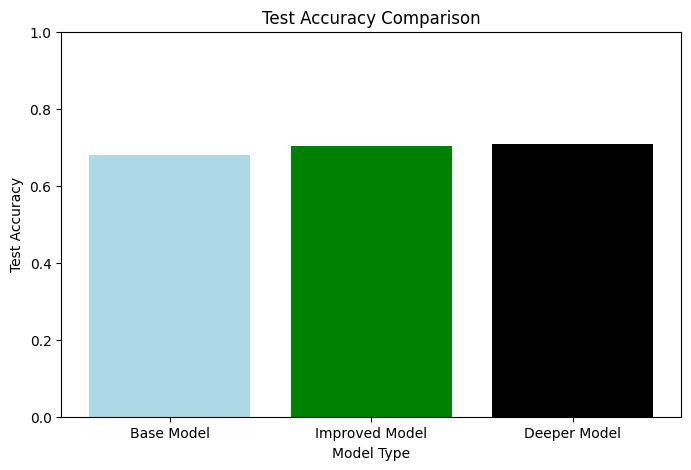

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

test_accuracies = {
    "Base Model": test_acc,
    "Improved Model": improved_test_acc,
    "Deeper Model": deeper_test_acc
}

df_results = pd.DataFrame(list(test_accuracies.items()), columns=["Model", "Test Accuracy"])
print(df_results)

plt.figure(figsize=(8, 5))
plt.bar(df_results["Model"], df_results["Test Accuracy"], color=['lightblue', 'green', 'black'])
plt.xlabel("Model Type")
plt.ylabel("Test Accuracy")
plt.ylim(0, 1)
plt.title("Test Accuracy Comparison")
plt.show()

### **Confusion Matrices**

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


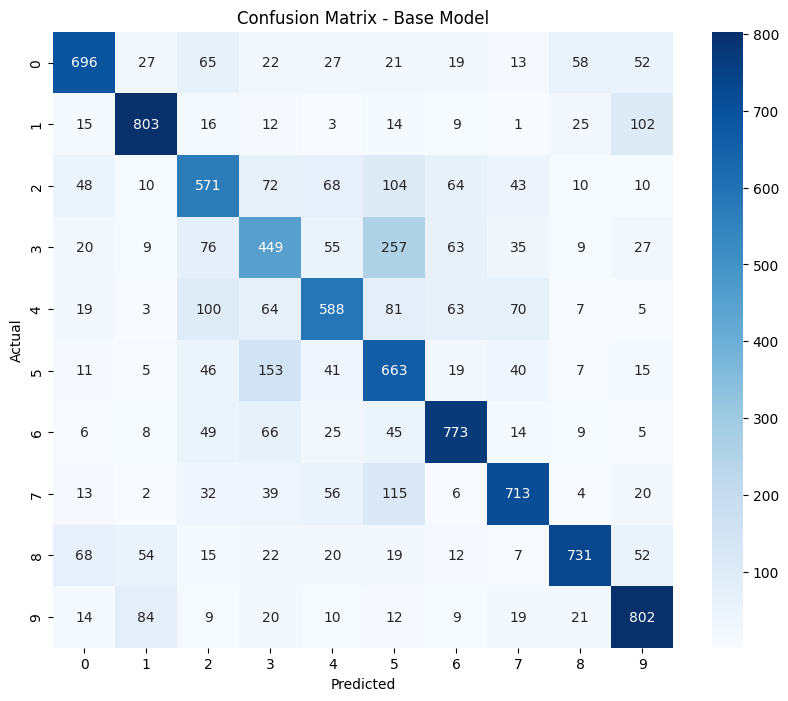

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


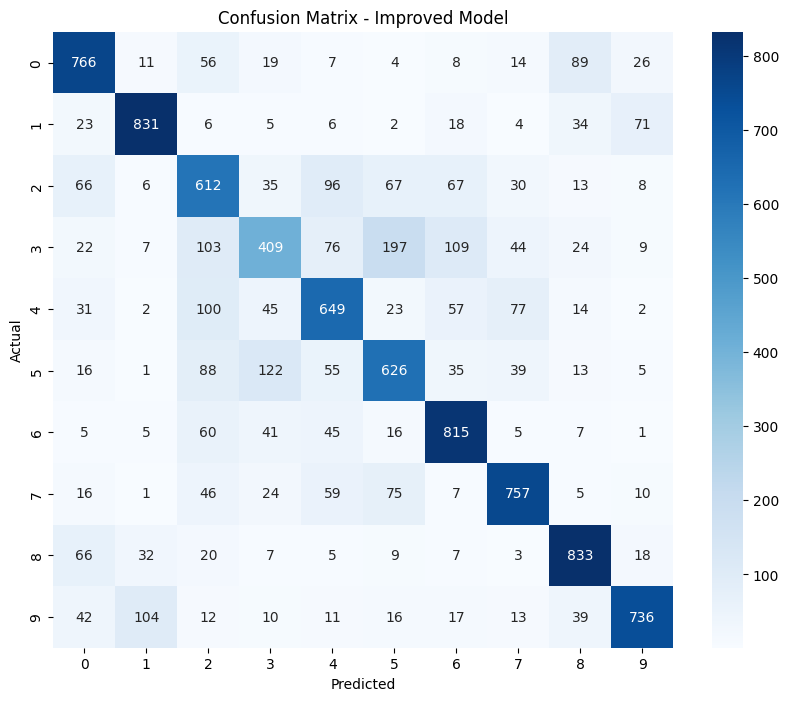

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


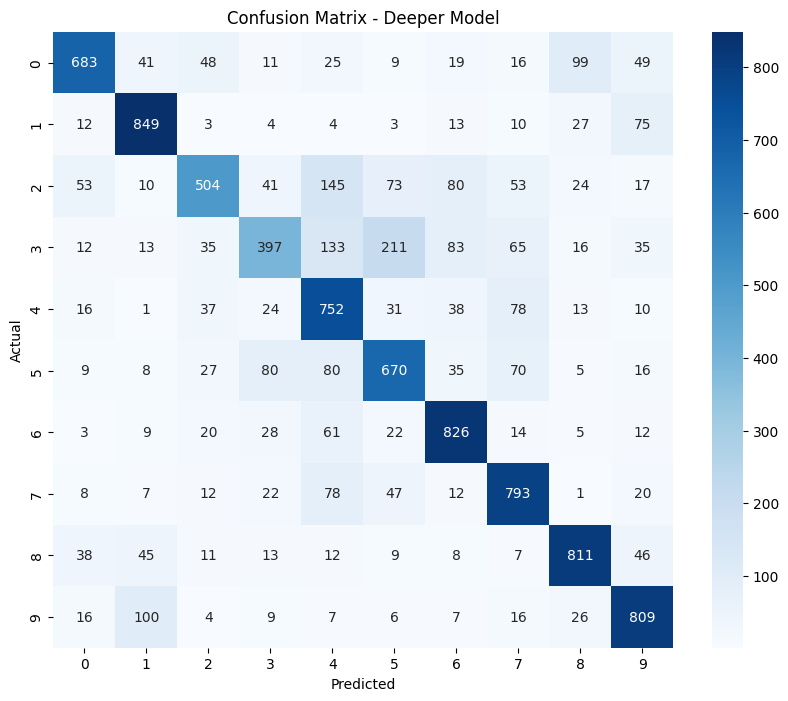

In [34]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(model, x_test, y_test, model_name):
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_true = np.argmax(y_test, axis=1)

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Generate confusion matrices for each model
plot_confusion_matrix(model, x_test, y_test, "Base Model")
plot_confusion_matrix(model_improved, x_test, y_test, "Improved Model")
plot_confusion_matrix(model_deeper, x_test, y_test, "Deeper Model")

### **Sample Predictions**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


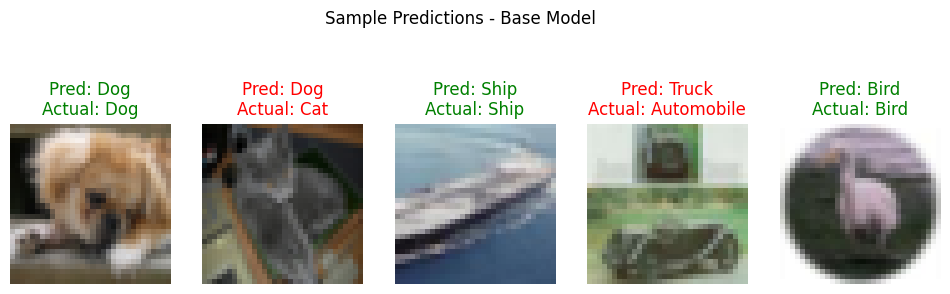

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


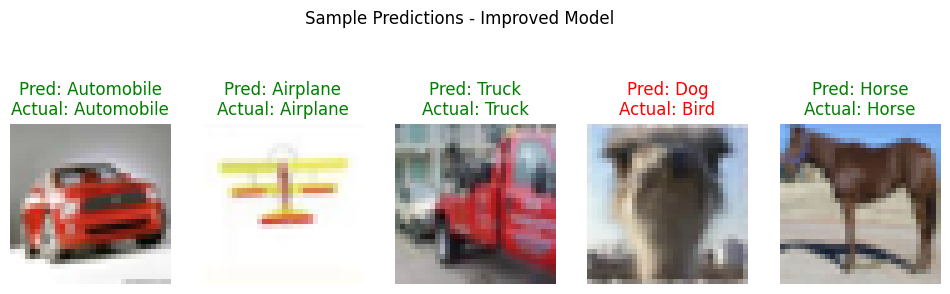

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


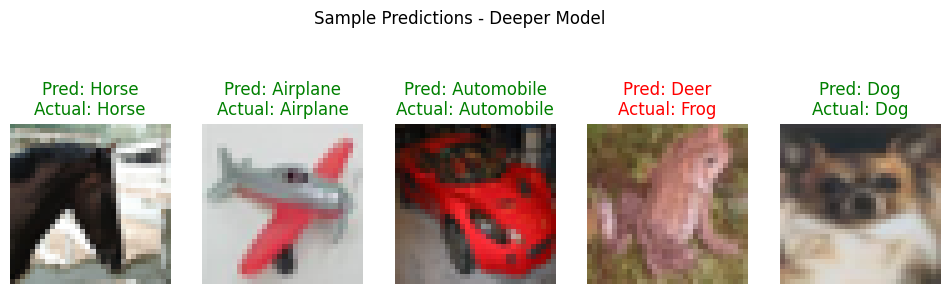

In [35]:
import random

# CIFAR-10 class labels
class_labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

def display_sample_predictions(model, x_test, y_test, model_name, num_samples=5):
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_true = np.argmax(y_test, axis=1)

    indices = random.sample(range(len(x_test)), num_samples)

    plt.figure(figsize=(12, 4))
    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(x_test[idx])
        plt.axis("off")
        actual_label = class_labels[y_true[idx]]
        predicted_label = class_labels[y_pred[idx]]
        color = "green" if actual_label == predicted_label else "red"
        plt.title(f"Pred: {predicted_label}\nActual: {actual_label}", color=color)

    plt.suptitle(f"Sample Predictions - {model_name}")
    plt.show()

# Display predictions for each model
display_sample_predictions(model, x_test, y_test, "Base Model")
display_sample_predictions(model_improved, x_test, y_test, "Improved Model")
display_sample_predictions(model_deeper, x_test, y_test, "Deeper Model")